In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing


In [2]:
# do not show user warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# the data is advertising budget that is spent on TV, Radio and Newspaper
# the sales column is the sales that is generated from the advertising budget

df_advertising = pd.read_csv("data\\advertising.csv")
df_advertising.head(10)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
df_advertising = df_advertising.head(40)
X = df_advertising[['TV']]
y = df_advertising[["Sales"]]

SkLearn_model = LinearRegression()
SkLearn_result = SkLearn_model.fit(X, y)

# print the coefficients
print(SkLearn_result.intercept_)
print(SkLearn_result.coef_)
#Model Interpretation 
#The Interpretation comes out as : y = 6.9748 + 0.05546x

[7.99142087]
[[0.04896291]]


In [32]:
# Use only one feature (TV) to train the model
X = df_advertising[['TV']]
y = df_advertising.Sales

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.5)

print("Data shape", X_train.shape)
# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
y_pred_train = lm2.predict(X_train)

# RMSE
print("Train error",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Data shape (20, 1)
Train error 1.5742529731329242
Test error 2.6129279784502835


In [33]:
from sklearn.linear_model import Ridge, Lasso

# use regularization to reduce overfitting
ridgeReg = Ridge(alpha=1)
ridgeReg.fit(X_train, y_train)
y_pred = ridgeReg.predict(X_test)
# RMSE
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

lassoReg = Lasso(alpha=0.3, fit_intercept=True)
lassoReg.fit(X_train, y_train)
y_pred = lassoReg.predict(X_test)
# RMSE
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test error 2.612925040428645
Test error 2.612581158447782


Train error 0.5836243562473882
Test error 121.2236724850387
Train error with regularization 1.3823137264982241
Test error with regularization 4.18334897618108


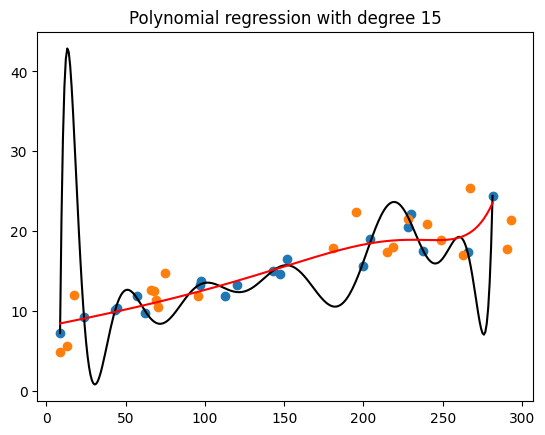

In [36]:
# polynomial regression
scaler = preprocessing.StandardScaler()
degree = 15
polyreg = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)
y_pred_train = polyreg.predict(X_train)

# add regularization to polynomial regression
polyreg_r = make_pipeline(PolynomialFeatures(degree), scaler, Ridge(alpha=0.1))
polyreg_r.fit(X_train, y_train)
y_pred_r = polyreg_r.predict(X_test)
y_pred_train_r = polyreg_r.predict(X_train)
# RMSE
print("Train error", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Test error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Train error with regularization", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_r)))
print("Test error with regularization",np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))

# plot the results
X = X_train['TV']
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
plt.figure()
plt.scatter(X_train['TV'], y_train)
plt.scatter(X_test['TV'], y_test)
plt.plot(X_seq, polyreg.predict(X_seq), color="black")
plt.plot(X_seq, polyreg_r.predict(X_seq), color="red")
plt.title("Polynomial regression with degree " + str(degree))
plt.show()

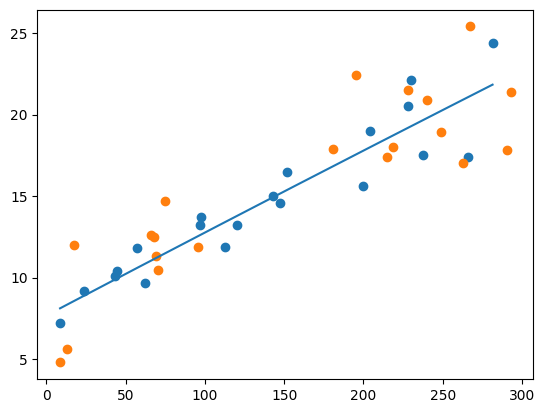

1.5741374490263915
2.604220670888854


In [37]:
import numpy

mymodel = numpy.poly1d(numpy.polyfit(X, y_train, 2))
myline = numpy.linspace(X.min(), X.max(), 300)
plt.scatter(X, y_train)
plt.scatter(X_test['TV'], y_test)
plt.plot(myline, mymodel(myline))
plt.show()
y_pred = mymodel(X_test)
y_pred_train = mymodel(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1 1.574252973132925 2.612927978450284
2 1.5741374490263915 2.604220670888854
3 1.5638056666568174 2.6591053843176096
4 1.563777250543398 2.6533026458708497
5 1.4741292132793913 3.0295671508839925
6 1.3715722031429045 4.0889737443786265
7 1.2143256574647419 6.016448848524259
8 1.1253392737439116 8.130608043807557
9 1.1128514099484461 9.524859363502747


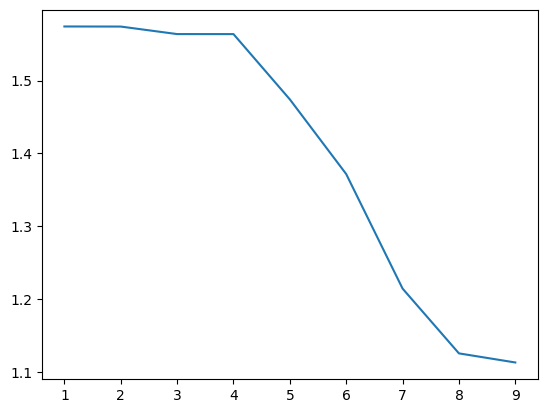

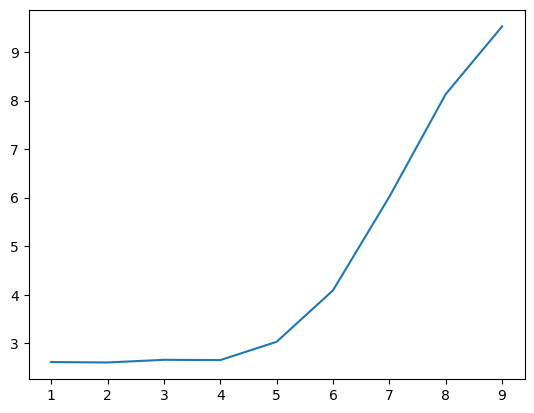

In [38]:
train_l = []
test_l = []
for i in range(1, 10):
    mymodel = numpy.poly1d(numpy.polyfit(X, y_train, i))
    y_pred = mymodel(X_test)
    y_pred_train = mymodel(X_train)
    train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    train_l.append(train)
    test_l.append(test)
    print(i, train, test)
l = numpy.linspace(1, 9, 9)
plt.plot(l, train_l)
plt.show()
plt.plot(l, test_l)
plt.show()

In [39]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ridgeReg = Ridge(alpha=0.1)
degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree), scaler, Ridge(alpha=0.1))
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)
y_pred_train = polyreg.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.5756047702169855
2.6391469414416004


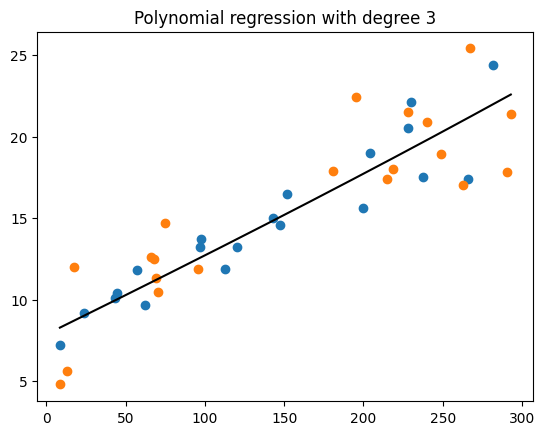

In [40]:
X = X_train['TV']
import matplotlib.pyplot as plt
import numpy as np

X_seq = np.linspace(min(X.min(), X_test['TV'].min()), max(X.max(), X_test['TV'].max()), 300).reshape(-1, 1)
plt.figure()
plt.scatter(X_train['TV'], y_train)
plt.scatter(X_test['TV'], y_test)
plt.plot(X_seq, polyreg.predict(X_seq), color="black")
plt.title("Polynomial regression with degree " + str(degree))
plt.show()